In [ ]:
import pandas as pd

path= "/content/time_series_covid19_confirmed_global.csv"
df= pd.read_csv(path)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,03-01-2023,03-02-2023,03-03-2023,03-04-2023,03-05-2023,03-06-2023,03-07-2023,03-08-2023,03-09-2023
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
print(df.isnull().sum())

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
03-05-2023          0
03-06-2023          0
03-07-2023          0
03-08-2023          0
03-09-2023          0
Length: 1147, dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print(df_cleaned.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
03-05-2023        0
03-06-2023        0
03-07-2023        0
03-08-2023        0
03-09-2023        0
Length: 1147, dtype: int64


In [ ]:
df['Province/State'] = df['Province/State'].fillna('Unknown')

In [ ]:
df['Lat'] = df['Lat'].fillna('Unknown')

In [ ]:
df['Long'] = df['Long'].fillna('Unknown')

In [ ]:
print(df['Province/State'].isnull().sum())
print(df['Lat'].isnull().sum())
print(df['Long'].isnull().sum())

0
0
0


In [ ]:
df_melted = df.melt(id_vars=['Country/Region'], value_vars= df.columns[4:], var_name='Date',  value_name="Cases")
df_melted["Date"] = pd.to_datetime(df_melted["Date"], format="mixed", dayfirst="True", errors='coerce')
df_melted['Date'] = df_melted['Date'].dt.strftime('%Y-%m-%d')
print(df_melted.tail(500))

              Country/Region        Date   Cases
329827                 China  2023-08-03    3547
329828                 China  2023-08-03    3514
329829                 China  2023-08-03    1276
329830                 China  2023-08-03     782
329831                 China  2023-08-03    7326
...                      ...         ...     ...
330322    West Bank and Gaza  2023-09-03  703228
330323  Winter Olympics 2022  2023-09-03     535
330324                 Yemen  2023-09-03   11945
330325                Zambia  2023-09-03  343135
330326              Zimbabwe  2023-09-03  264276

[500 rows x 3 columns]


In [ ]:
df_melted['Rolling_avarage_cases'] = df_melted.groupby('Country/Region')['Cases'].transform(lambda x: x.rolling(7, min_periods=1).mean())
print(df_melted.tail(500))

              Country/Region        Date   Cases  Rolling_avarage_cases
329827                 China  2023-08-03    3547           20174.857143
329828                 China  2023-08-03    3514           10372.428571
329829                 China  2023-08-03    1276            9492.285714
329830                 China  2023-08-03     782            8340.142857
329831                 China  2023-08-03    7326            8661.714286
...                      ...         ...     ...                    ...
330322    West Bank and Gaza  2023-09-03  703228          703228.000000
330323  Winter Olympics 2022  2023-09-03     535             535.000000
330324                 Yemen  2023-09-03   11945           11945.000000
330325                Zambia  2023-09-03  343135          343119.000000
330326              Zimbabwe  2023-09-03  264276          264169.571429

[500 rows x 4 columns]


In [ ]:
df_melted['New Cases'] = df_melted.groupby('Country/Region')['Cases'].diff().fillna(0)
print(df_melted.tail(500))

              Country/Region        Date   Cases  Rolling_avarage_cases  \
329827                 China  2023-08-03    3547           20174.857143   
329828                 China  2023-08-03    3514           10372.428571   
329829                 China  2023-08-03    1276            9492.285714   
329830                 China  2023-08-03     782            8340.142857   
329831                 China  2023-08-03    7326            8661.714286   
...                      ...         ...     ...                    ...   
330322    West Bank and Gaza  2023-09-03  703228          703228.000000   
330323  Winter Olympics 2022  2023-09-03     535             535.000000   
330324                 Yemen  2023-09-03   11945           11945.000000   
330325                Zambia  2023-09-03  343135          343119.000000   
330326              Zimbabwe  2023-09-03  264276          264169.571429   

        New Cases  
329827   -37217.0  
329828      -33.0  
329829    -2238.0  
329830     -494.0  

In [ ]:
deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

death_melted = deaths.melt(id_vars=['Country/Region'], value_vars= deaths.columns[4:], var_name="Date", value_name='Deaths')
death_melted['Date'] = pd.to_datetime(death_melted['Date'], format='mixed', dayfirst=True, errors='coerce')

df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='mixed', errors='coerce', dayfirst=True)

df_merged = pd.merge(df_melted, death_melted, on=["Country/Region", "Date"])
df_merged["Mortality Rate"] = (( df_merged['Deaths']/ df_merged['Cases'].replace(0, pd.NA)) *100)
print(df_merged.tail(500))

               Country/Region       Date   Cases  Deaths Mortality Rate
2378083                France 2023-09-03  229020     649       0.283381
2378084                France 2023-09-03  229020    1010        0.44101
2378085                France 2023-09-03  229020    1092       0.476814
2378086                France 2023-09-03  229020     187       0.081652
2378087                France 2023-09-03  229020     314       0.137106
...                       ...        ...     ...     ...            ...
2378578    West Bank and Gaza 2023-09-03  703228    5708       0.811686
2378579  Winter Olympics 2022 2023-09-03     535       0            0.0
2378580                 Yemen 2023-09-03   11945    2159      18.074508
2378581                Zambia 2023-09-03  343135    4057       1.182333
2378582              Zimbabwe 2023-09-03  264276    5671       2.145863

[500 rows x 5 columns]


In [ ]:
recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")

recovered_melted = recovered.melt(id_vars=['Country/Region'], value_vars = recovered.columns[4:], var_name="Date", value_name="Recovery")

df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='mixed', errors='coerce', dayfirst=True)
recovered_melted['Date'] = pd.to_datetime(recovered_melted['Date'], format='mixed', errors='coerce', dayfirst=True)

df_merged= pd.merge(df_melted, recovered_melted, on=['Country/Region', 'Date'])
df_merged['Recovery Rate'] = ((df_merged['Recovery'] / df_merged['Cases'].replace(0, pd.NA))*100)

print(df_merged.iloc[225: 232])

    Country/Region       Date  Cases  Recovery Recovery Rate
225          China 2020-01-22      1         0           0.0
226          China 2020-01-22      1         0           0.0
227          China 2020-01-22      1         0           0.0
228          China 2020-01-22      1         0           0.0
229          China 2020-01-22      1         0           0.0
230          China 2020-01-22      1        28        2800.0
231          China 2020-01-22      1         0           0.0


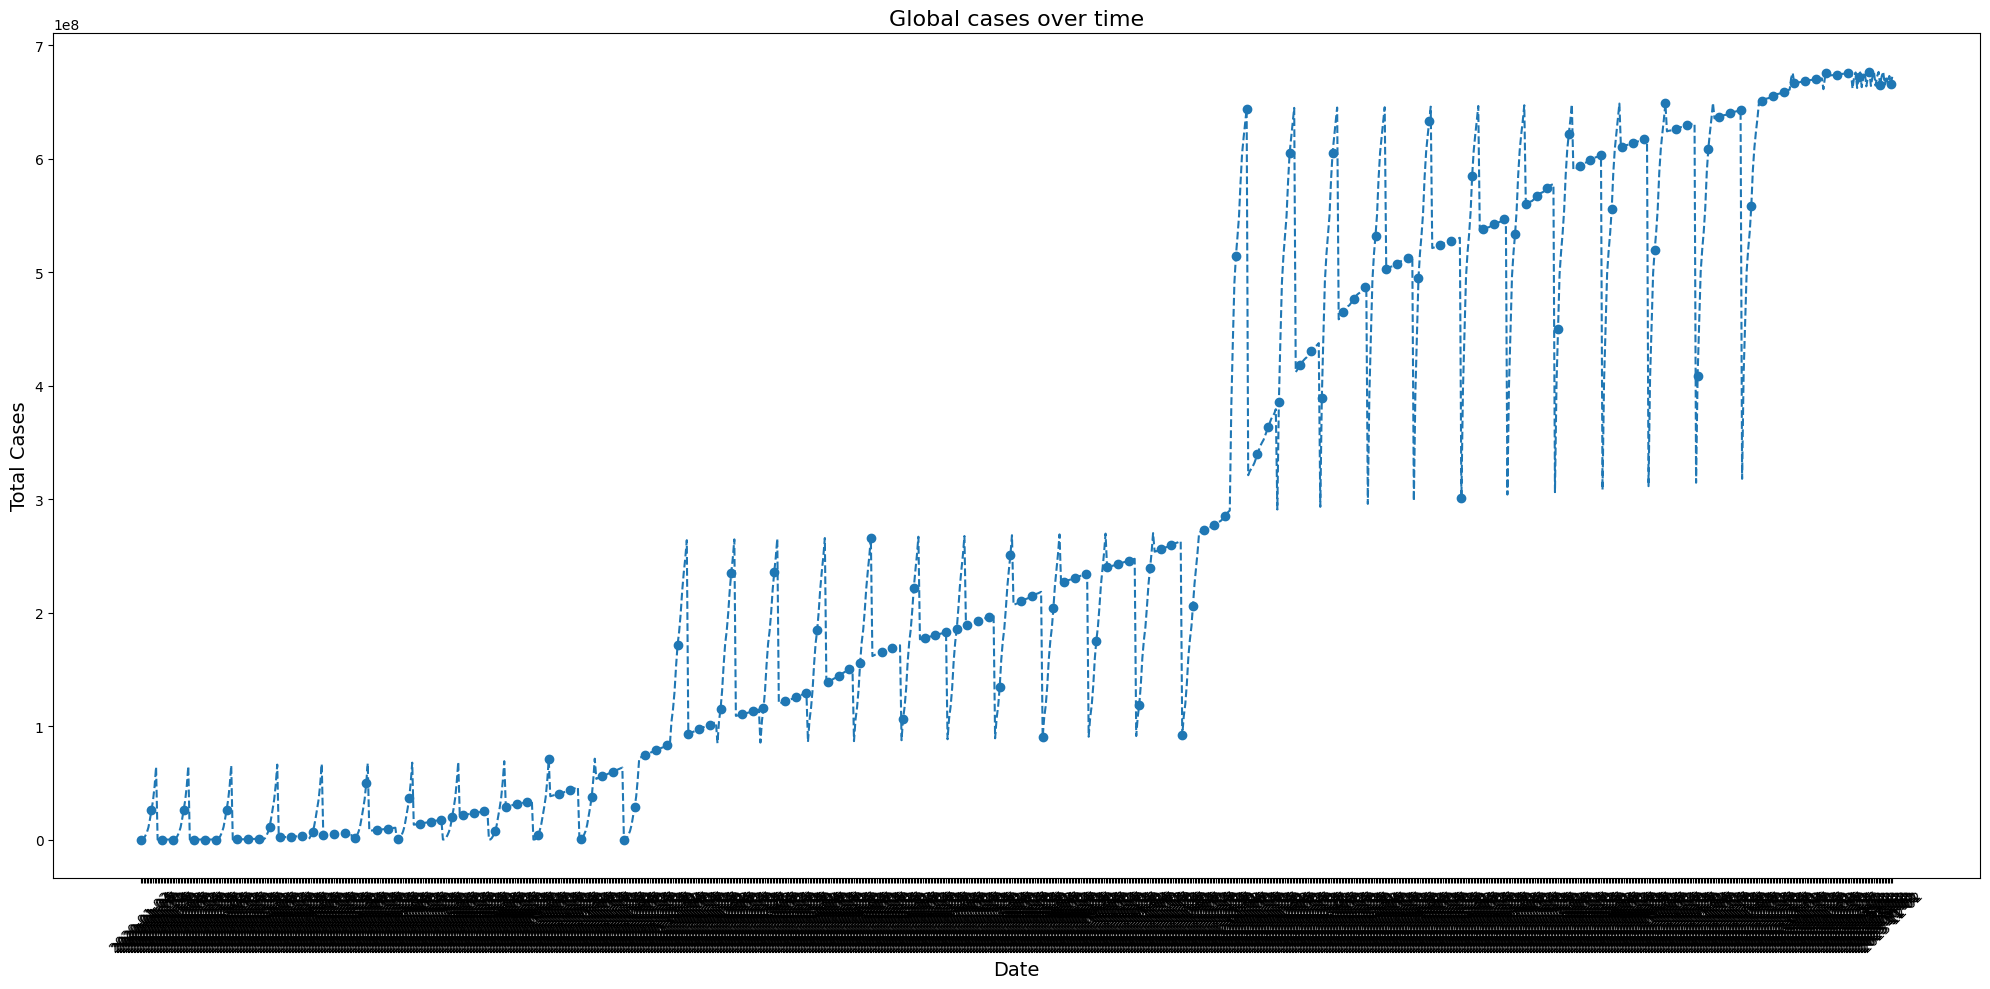

In [ ]:
import matplotlib.pyplot as plt
global_cases = df_melted.groupby('Date')['Cases'].sum().reset_index()

plt.figure(figsize=(20,10))
plt.plot(global_cases['Date'], global_cases['Cases'], marker= 'o', markevery = 7, linestyle = '--')
plt.title('Global cases over time' , fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45)
plt.grid = True
plt.tight_layout()
plt.show()


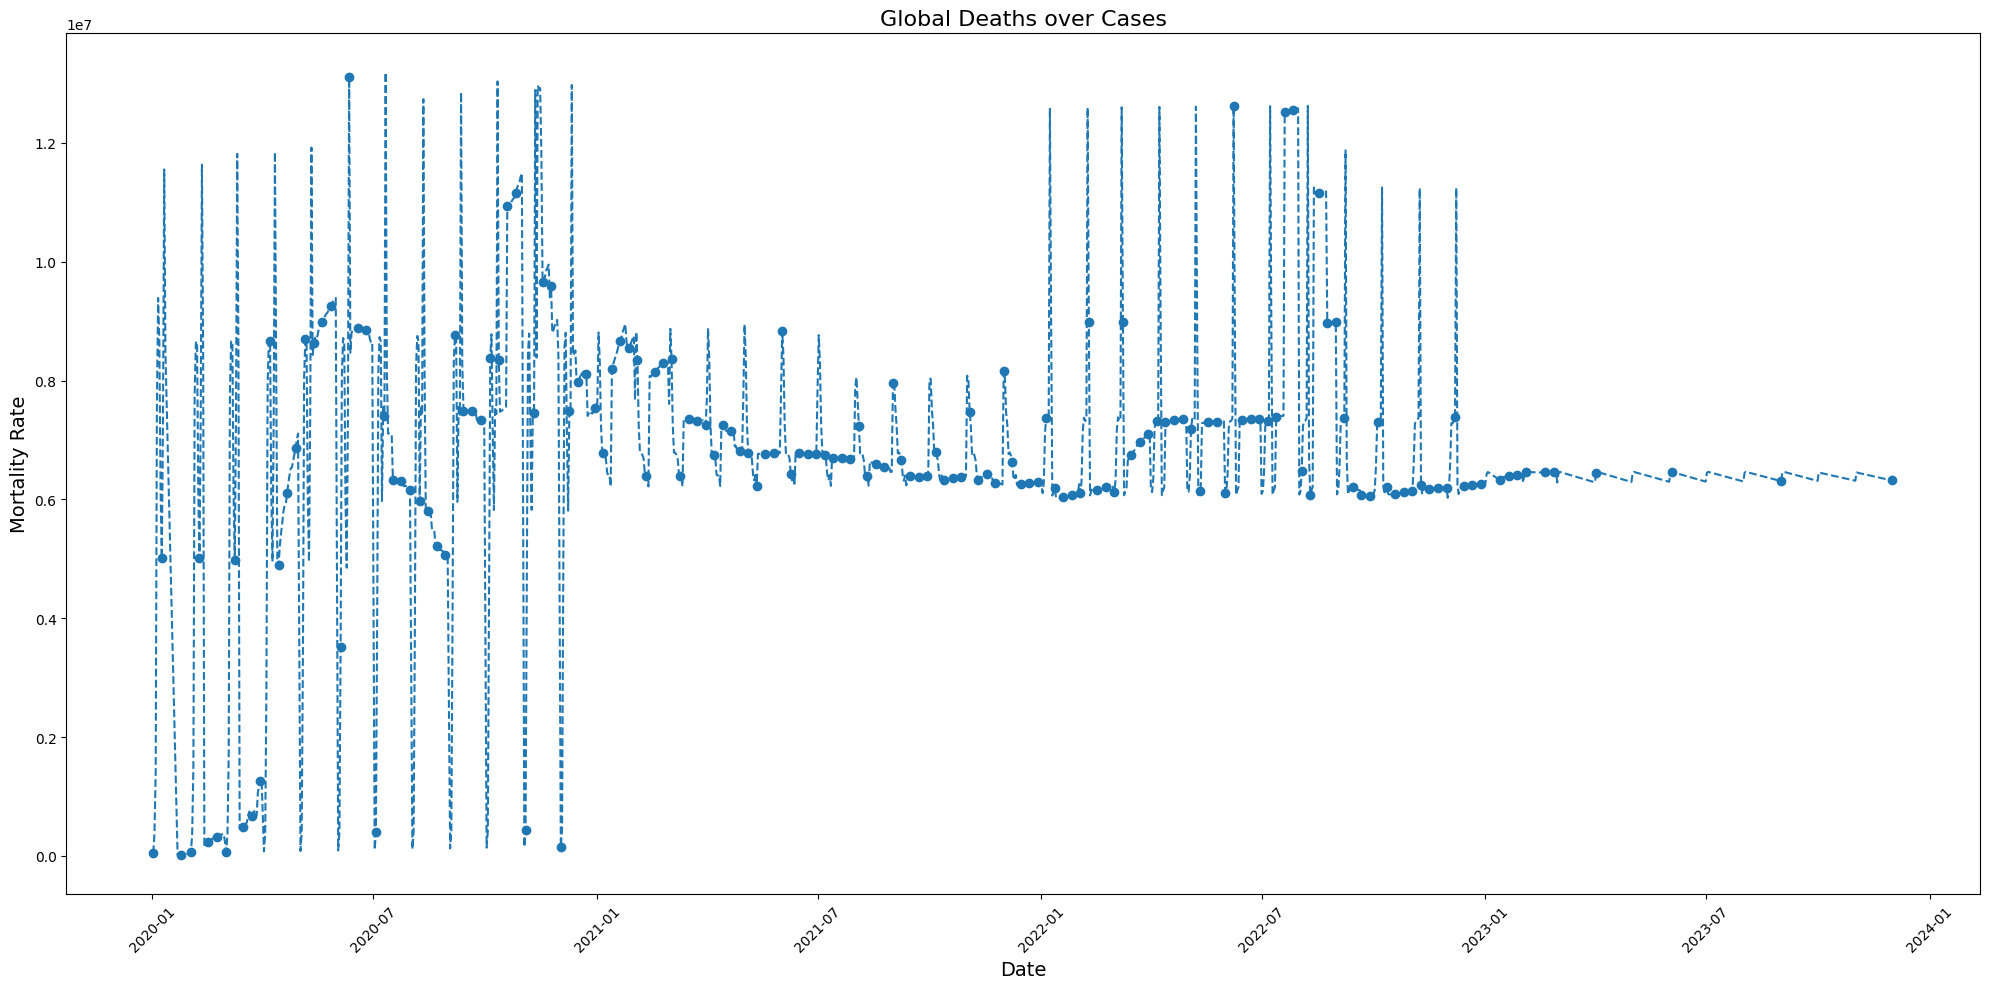

In [ ]:
import matplotlib.pyplot as plt

global_mortality = df_merged.groupby('Date')['Mortality Rate'].sum().reset_index()

plt.figure(figsize= (20, 10))
plt.plot(global_mortality['Date'], global_mortality['Mortality Rate'], marker='o', markevery=7, linestyle='--')
plt.title("Global Deaths over Cases", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid=True
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np


df = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', periods=150),
    'Vaccination Rate': np.linspace(0, 75, 150),
    'Recovery Rate': np.linspace(50, 90, 150),
    'Death Rate': np.linspace(10, 2, 150)
})


df_long = df.melt(id_vars='Date', value_vars=['Vaccination Rate', 'Recovery Rate', 'Death Rate'],
                  var_name='Metric', value_name='Percentage')


fig = px.area(df_long, x='Date', y='Percentage', color='Metric',
              title='Vaccination and Recovery Trends Over Time',
              labels={'Percentage': 'Percentage (%)', 'Date': 'Date'})

fig.update_layout(yaxis_range=[0, 100])
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Sample data: 'Country/Region' and metric column, e.g., 'Mortality Rate'
df = pd.DataFrame({
    'Country/Region': ['United States', 'India', 'Brazil', 'Russia', 'South Africa'],
    'Mortality Rate': [1.79, 1.34, 2.35, 1.78, 3.15]
})

fig = px.choropleth(df,
                    locations='Country/Region',
                    locationmode='country names',
                    color='Mortality Rate',
                    color_continuous_scale='Reds',
                    title='COVID-19 Mortality Rate by Country',
                    labels={'Mortality Rate': 'Mortality Rate (%)'})

fig.update_geos(showcoastlines=True, coastlinecolor="RebeccaPurple")
fig.show()
